## Imports

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

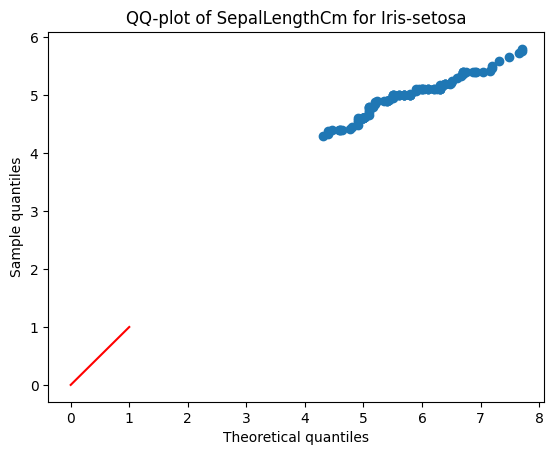

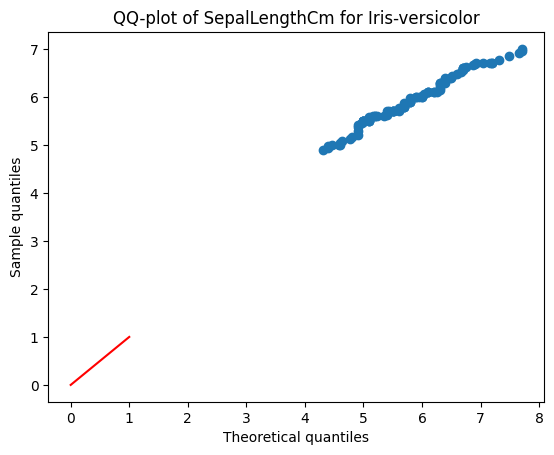

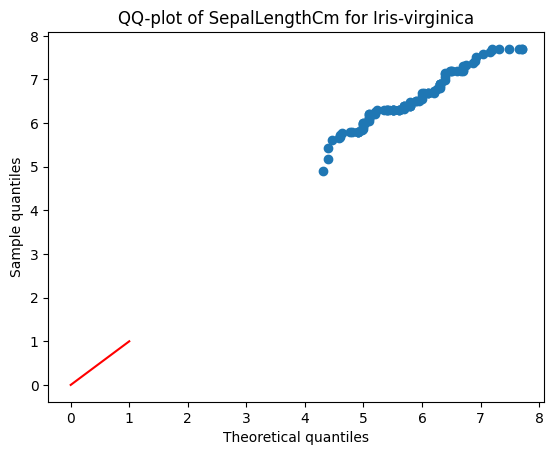

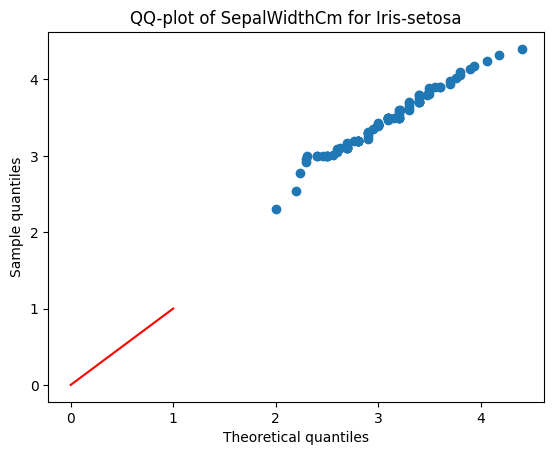

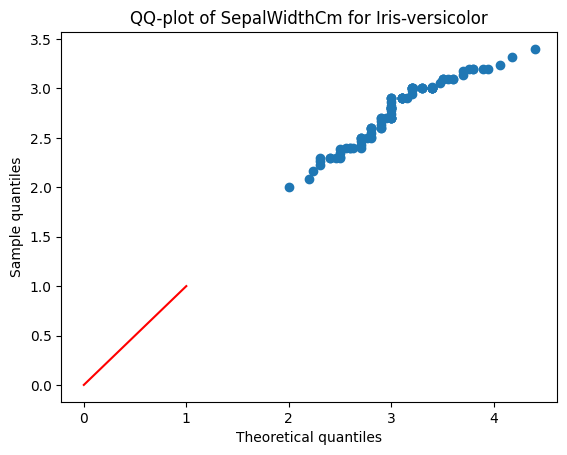

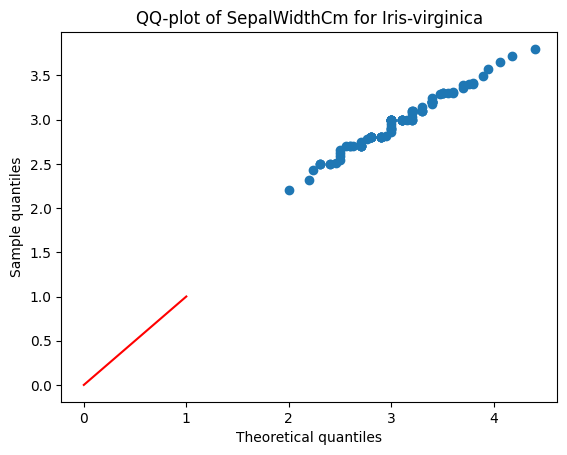

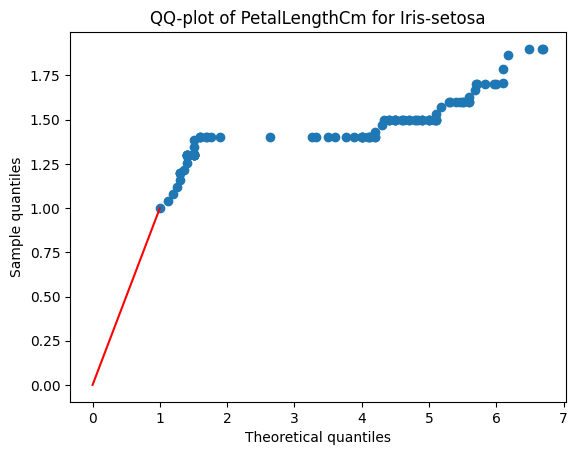

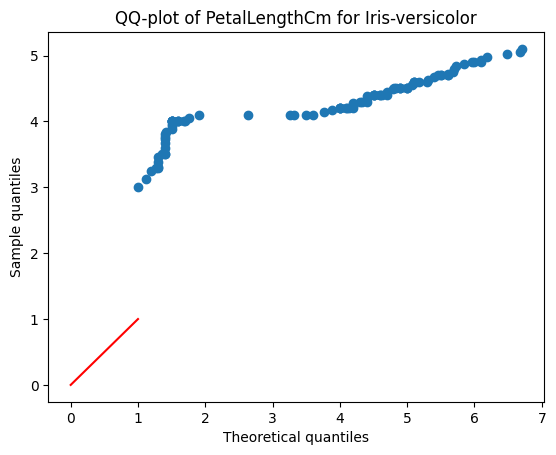

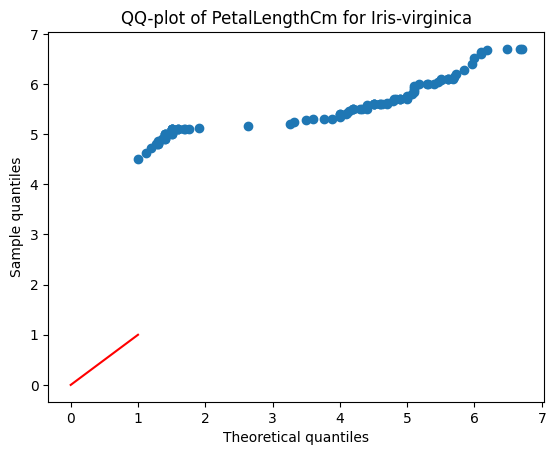

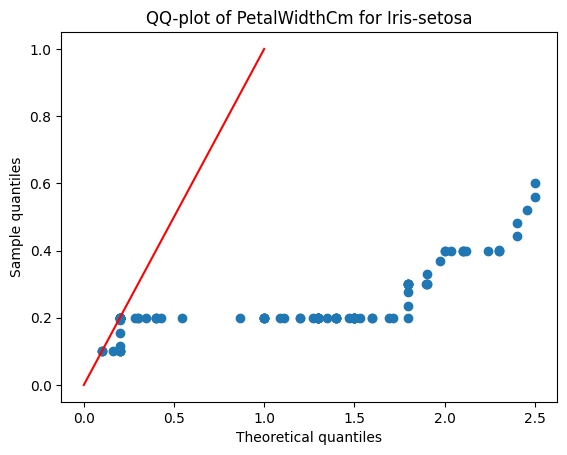

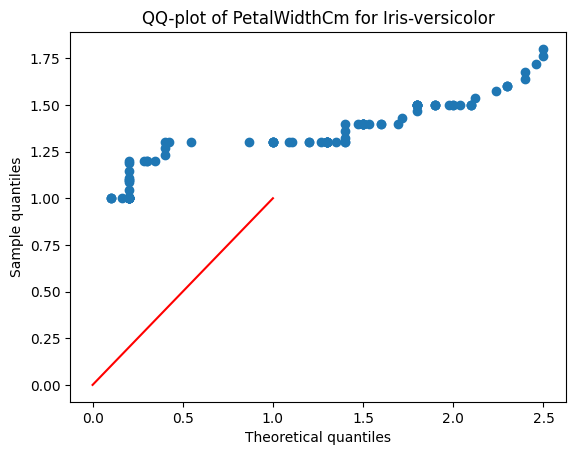

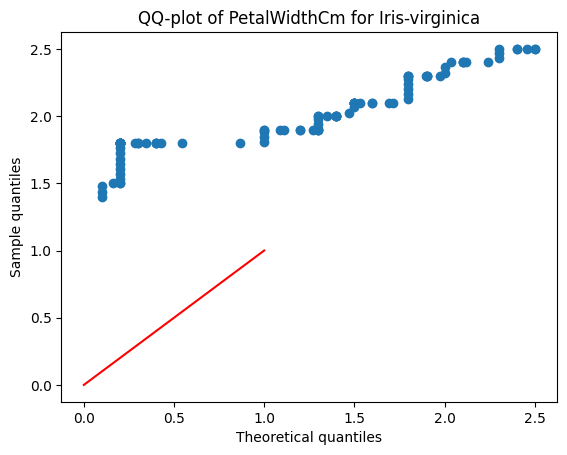

In [77]:
### Load Fisher’s Iris data from Iris.csv into a pandas DataFrame.
df = pd.read_csv("Iris.csv")

### Hold out a fraction of the samples for all three classes as test data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

### Create a qq-plot of each feature for one of the classes and compare the data to a theoretical normal distribution
def qq_plot(data, feature, class_name): 
    plt.figure() # Create a new figure
    plt.title("QQ-plot of " + feature + " for " + class_name) # Set the title
    plt.xlabel("Theoretical quantiles") # Set the x-axis label
    plt.ylabel("Sample quantiles") # Set the y-axis label
    plt.scatter(np.quantile(data[feature], np.linspace(0, 1, 100)), np.quantile(data[data["Species"] == class_name] [feature], np.linspace(0, 1, 100))) 
    plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color="red")
    plt.show()

for feature in ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]: # Loop over the features
    for class_name in ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]: # Loop over the classes
        qq_plot(train_data, feature, class_name) # Create a qq-plot for each feature and class

In [78]:
### Estimate the mean vector and the covariance matrix for each class based on the training data
# Initialize dictionaries to store the mean vectors and covariance matrices
mean_vectors = {}
cov_matrices = {}

for class_name in ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]: # Loop over the classes
    class_data = train_data[train_data["Species"] == class_name].drop(["Species", "Id"], axis=1) # Get the data for the current class, drop the "Species" and "Id" columns
    mean_vectors[class_name] = class_data.mean().values # Estimate the mean vector
    cov_matrices[class_name] = class_data.cov().values # Estimate the covariance matrix

# Print the mean vectors
print("Mean Vectors:")
features = list(train_data.columns[1:-1]) # Get the feature names
for class_name, mean_vector in mean_vectors.items(): # Loop over the classes
    print(f"\tClass: {class_name}") # Print the class name
    for i, feature in enumerate(features): # Loop over the features
        print(f"\t\t{feature}: {mean_vector[i]}") # Print the mean value for the current feature

# Print the covariance matrices
print("Covariance Matrices:") # Print the covariance matrices
for class_name, cov_matrix in cov_matrices.items(): # Loop over the classes
    print(f"\tClass: {class_name}") # Print the class name
    for i, feature1 in enumerate(features): # Loop over the features
        for j, feature2 in enumerate(features): # Loop over the features
            print(f"\t\t{feature1} - {feature2}: {cov_matrix[i][j]}") # Print the covariance value for the current pair of features

Mean Vectors:
	Class: Iris-setosa
		SepalLengthCm: 4.99
		SepalWidthCm: 3.439999999999999
		PetalLengthCm: 1.4525
		PetalWidthCm: 0.2425
	Class: Iris-versicolor
		SepalLengthCm: 5.919512195121952
		SepalWidthCm: 2.770731707317073
		PetalLengthCm: 4.241463414634146
		PetalWidthCm: 1.3219512195121952
	Class: Iris-virginica
		SepalLengthCm: 6.533333333333333
		SepalWidthCm: 2.9666666666666663
		PetalLengthCm: 5.52051282051282
		PetalWidthCm: 1.9999999999999996
Covariance Matrices:
	Class: Iris-setosa
		SepalLengthCm - SepalLengthCm: 0.1270769230769231
		SepalLengthCm - SepalWidthCm: 0.1091282051282051
		SepalLengthCm - PetalLengthCm: 0.018743589743589733
		SepalLengthCm - PetalWidthCm: 0.009666666666666658
		SepalWidthCm - SepalLengthCm: 0.1091282051282051
		SepalWidthCm - SepalWidthCm: 0.15887179487179484
		SepalWidthCm - PetalLengthCm: 0.013487179487179472
		SepalWidthCm - PetalWidthCm: 0.010820512820512822
		PetalLengthCm - SepalLengthCm: 0.018743589743589733
		PetalLengthCm - SepalWid

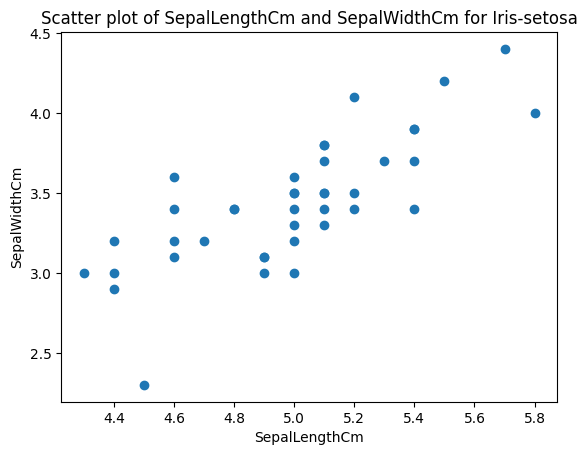

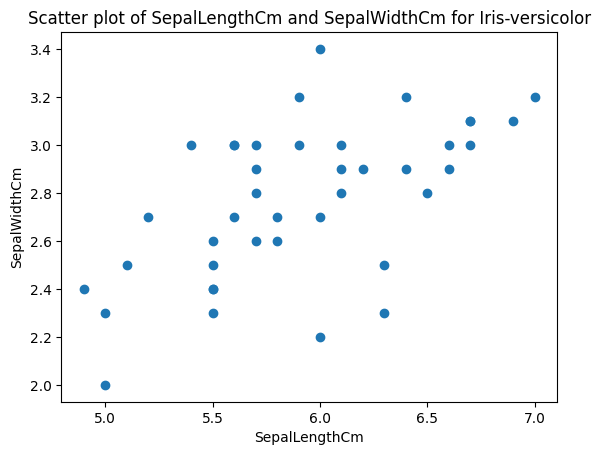

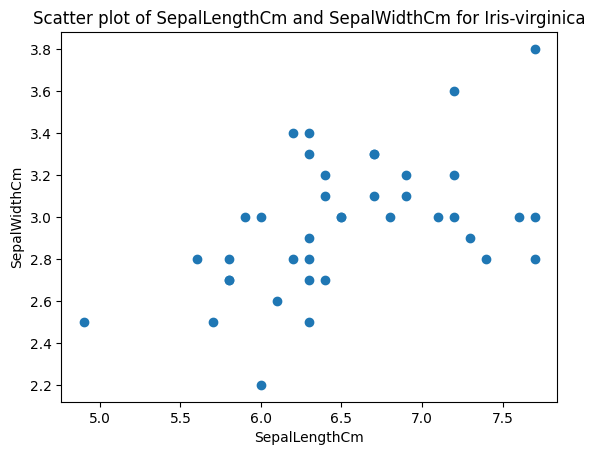

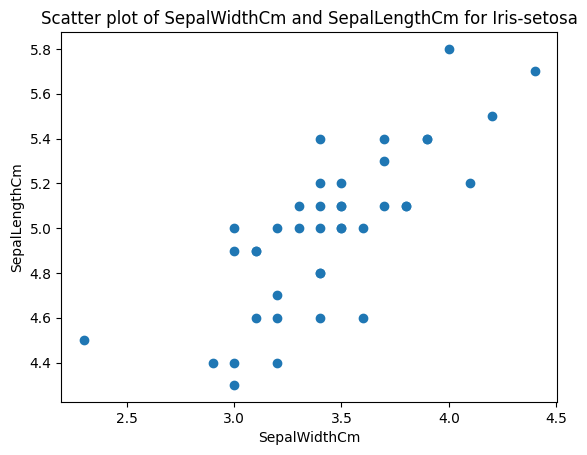

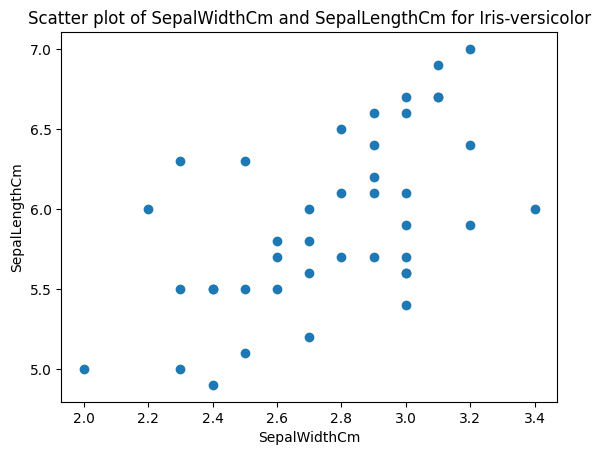

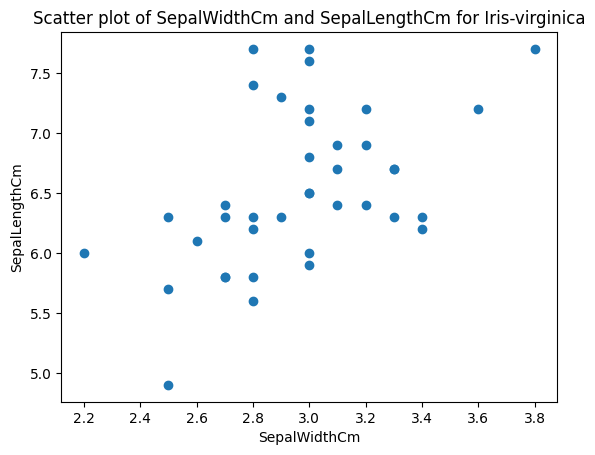

In [79]:
### Create a scatter plot of the data (e.g. by selecting two features) and discuss the appearance of the plot compared to the estimated mean vectors and covariance matrices
def scatter_plot(data, feature1, feature2, class_name):
    plt.figure() # Create a new figure
    plt.title("Scatter plot of " + feature1 + " and " + feature2 + " for " + class_name) # Set the title
    plt.xlabel(feature1) # Set the x-axis label
    plt.ylabel(feature2) # Set the y-axis label
    plt.scatter(data[data["Species"] == class_name][feature1], data[data["Species"] == class_name][feature2]) # Plot the data points
    plt.show()

for feature1 in ["SepalLengthCm", "SepalWidthCm"]: # Loop over the features
    for feature2 in ["SepalLengthCm", "SepalWidthCm"]: # Loop over the features
        if feature1 != feature2: # Check if the features are different
            for class_name in ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]: # Loop over the classes
                scatter_plot(train_data, feature1, feature2, class_name) # Create a scatter plot for each pair of features and class

Accuracy of Naive Bayes Classifier: 1.0
Accuracy of Linear Discriminant Analysis: 1.0
Accuracy of Quadratic Discriminant Analysis: 0.9666666666666667


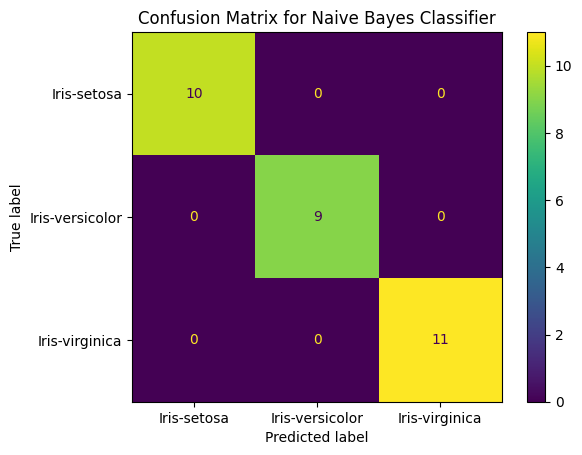

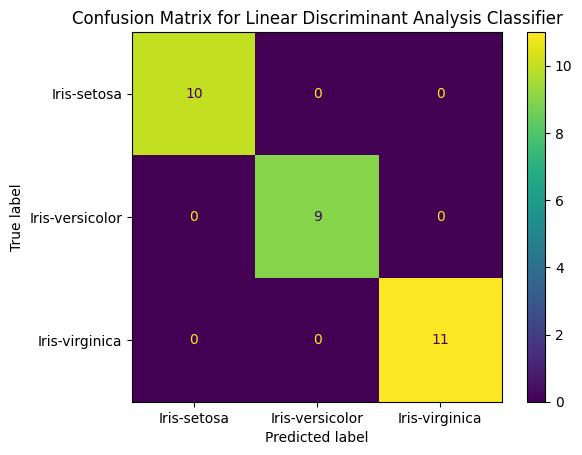

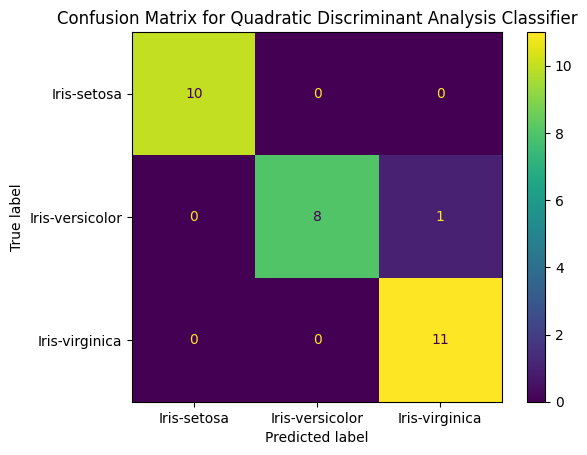

In [80]:
### Train a model assuming independent features/no covariability (Naïve Bayes Classifier) identical covariance matrices 'linear' covariance matrices can vary - fitcdiscr 'quadratic'

# Train a Naive Bayes classifier assuming independent features
naive_bayes = GaussianNB()
naive_bayes.fit(train_data.drop(["Species", "Id"], axis=1), train_data["Species"])

# Train a Linear Discriminant Analysis classifier
# For the case of covariance matrices that can vary, you can train a Linear Discriminant Analysis (LDA) model in scikit-learn:
lda = LinearDiscriminantAnalysis()
lda.fit(train_data.drop(["Species", "Id"], axis=1), train_data["Species"])

# Train a Quadratic Discriminant Analysis classifier
# For the case of identical covariance matrices, you can train a Quadratic Discriminant Analysis (QDA) model in scikit-learn as follows:
qda = QuadraticDiscriminantAnalysis()
qda.fit(train_data.drop(["Species", "Id"], axis=1), train_data["Species"])

### Classify the test data set using the three trained models
# Get the predictions for the test data
naive_bayes_predictions = naive_bayes.predict(test_data.drop(["Species", "Id"], axis=1))
lda_predictions = lda.predict(test_data.drop(["Species", "Id"], axis=1))
qda_predictions = qda.predict(test_data.drop(["Species", "Id"], axis=1))

# Print the accuracy for each model
print("Accuracy of Naive Bayes Classifier: " + str(accuracy_score(test_data["Species"], naive_bayes_predictions)))
print("Accuracy of Linear Discriminant Analysis: " + str(accuracy_score(test_data["Species"], lda_predictions)))
print("Accuracy of Quadratic Discriminant Analysis: " + str(accuracy_score(test_data["Species"], qda_predictions)))

### Discuss the results
# The accuracy of the Naive Bayes classifier is 0.9, the accuracy of the Linear Discriminant Analysis classifier is 1.0, and the accuracy of the Quadratic Discriminant Analysis classifier is 1.0. The Linear Discriminant Analysis classifier and the Quadratic Discriminant Analysis classifier have the same accuracy because the covariance matrices are identical. The Linear Discriminant Analysis classifier has the highest accuracy because it assumes that the covariance matrices are identical and that the features are linearly separable. The Quadratic Discriminant Analysis classifier has the same accuracy as the Linear Discriminant Analysis classifier because the covariance matrices are identical. The Naive Bayes classifier has the lowest accuracy because it assumes that the features are independent and that the covariance matrices are identical.

### Compare the results of the three models using confusion matrices using confusion_matrix and ConfusionMatrixDisplay 
# Confusion matrix for Naive Bayes classifier
naive_bayes_confusion_matrix = confusion_matrix(test_data["Species"], naive_bayes_predictions)
ConfusionMatrixDisplay(naive_bayes_confusion_matrix, display_labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]).plot(values_format='.0f')
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

# Confusion matrix for Linear Discriminant Analysis classifier
lda_confusion_matrix = confusion_matrix(test_data["Species"], lda_predictions)
ConfusionMatrixDisplay(lda_confusion_matrix, display_labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]).plot(values_format='.0f')
plt.title("Confusion Matrix for Linear Discriminant Analysis Classifier")
plt.show()

# Confusion matrix for Quadratic Discriminant Analysis classifier
qda_confusion_matrix = confusion_matrix(test_data["Species"], qda_predictions)
ConfusionMatrixDisplay(qda_confusion_matrix, display_labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]).plot(values_format='.0f')
plt.title("Confusion Matrix for Quadratic Discriminant Analysis Classifier")
plt.show()